In [2]:
# %pip install lazypredict

In [3]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import NearestCentroid

C:\Users\panak\AppData\Local\Temp\ipykernel_16796\37088760.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
from lazypredict.Supervised import LazyClassifier

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('train.csv')

In [11]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.00,45211,45211,45211,45211,45211.00,45211,45211,45211,45211.00,45211,45211.00,45211.00,45211.00,45211.00,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.94,NaN,NaN,NaN,NaN,1362.27,NaN,NaN,NaN,15.81,NaN,258.16,2.76,40.20,0.58,NaN,NaN
std,10.62,NaN,NaN,NaN,NaN,3044.77,NaN,NaN,NaN,8.32,NaN,257.53,3.10,100.13,2.30,NaN,NaN
min,18.00,NaN,NaN,NaN,NaN,-8019.00,NaN,NaN,NaN,1.00,NaN,0.00,1.00,-1.00,0.00,NaN,NaN
25%,33.00,NaN,NaN,NaN,NaN,72.00,NaN,NaN,NaN,8.00,NaN,103.00,1.00,-1.00,0.00,NaN,NaN
50%,39.00,NaN,NaN,NaN,NaN,448.00,NaN,NaN,NaN,16.00,NaN,180.00,2.00,-1.00,0.00,NaN,NaN
75%,48.00,NaN,NaN,NaN,NaN,1428.00,NaN,NaN,NaN,21.00,NaN,319.00,3.00,-1.00,0.00,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Seznam sloupců**

age - ok, nechat jak je.

job - vyhodit hodnoty unknown

marital - label enocoder - 1, 2,3

education - laber encoder a unknown nahradit secondary

housing, loan - yes/ no nechat na 0 a 1

contact - nechat zatím 0, 1, 2 - zvážit korelaci

day a month - den vyhodit, nechat měsíc - graf před zprac, histogram atd.

duration -  délka trvání hovoru - dáme do grafu a rozhodneme outlayers

campaign - řešit outlayers

pdays - nechat jak je

poutcome - nechat jak je



***y - výsledek - yes / no nechat***

In [14]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [16]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [17]:
data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [18]:
data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [19]:
data[(data.pdays != -1) & (data.poutcome == 'unknown')].y.count()

5

In [20]:
data[data['education'] == 'unknown'].y.count()

1857

In [21]:
data_mod = data[data['job'] != 'unknown']

In [22]:
data_mod = pd.get_dummies(data_mod,columns=['job'])

In [23]:
data_mod

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,...,False,False,False,True,False,False,False,False,False,False
1,44,single,secondary,no,29,yes,no,unknown,5,may,...,False,False,False,False,False,False,False,False,True,False
2,33,married,secondary,no,2,yes,yes,unknown,5,may,...,False,True,False,False,False,False,False,False,False,False
3,47,married,unknown,no,1506,yes,no,unknown,5,may,...,True,False,False,False,False,False,False,False,False,False
5,35,married,tertiary,no,231,yes,no,unknown,5,may,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,...,False,False,False,False,False,False,False,False,True,False
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,...,False,False,False,False,True,False,False,False,False,False
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,...,False,False,False,False,True,False,False,False,False,False
45209,57,married,secondary,no,668,no,no,telephone,17,nov,...,True,False,False,False,False,False,False,False,False,False


In [24]:
data_mod.education[data_mod.education == 'unknown'] = 'secondary'

In [25]:
data_mod.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [26]:
L = LabelEncoder()

data_mod = data_mod.apply(L.fit_transform)

data_mod.sample(5)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
6521,16,1,1,0,657,1,0,2,26,8,...,0,0,0,0,0,0,0,0,1,0
12829,15,2,1,0,1065,0,1,0,6,5,...,0,0,0,0,0,0,1,0,0,0
19642,26,0,2,0,987,1,0,0,6,1,...,0,0,0,1,0,0,0,0,0,0
43668,25,1,2,0,6486,0,0,0,11,8,...,0,0,0,0,0,1,0,0,0,0
42355,33,1,1,0,2132,0,0,0,24,9,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_mod = data_mod.drop(['duration','day','pdays','previous'],axis=1)

In [28]:
correlation_matrix = data_mod.corr()

# correlation_matrix

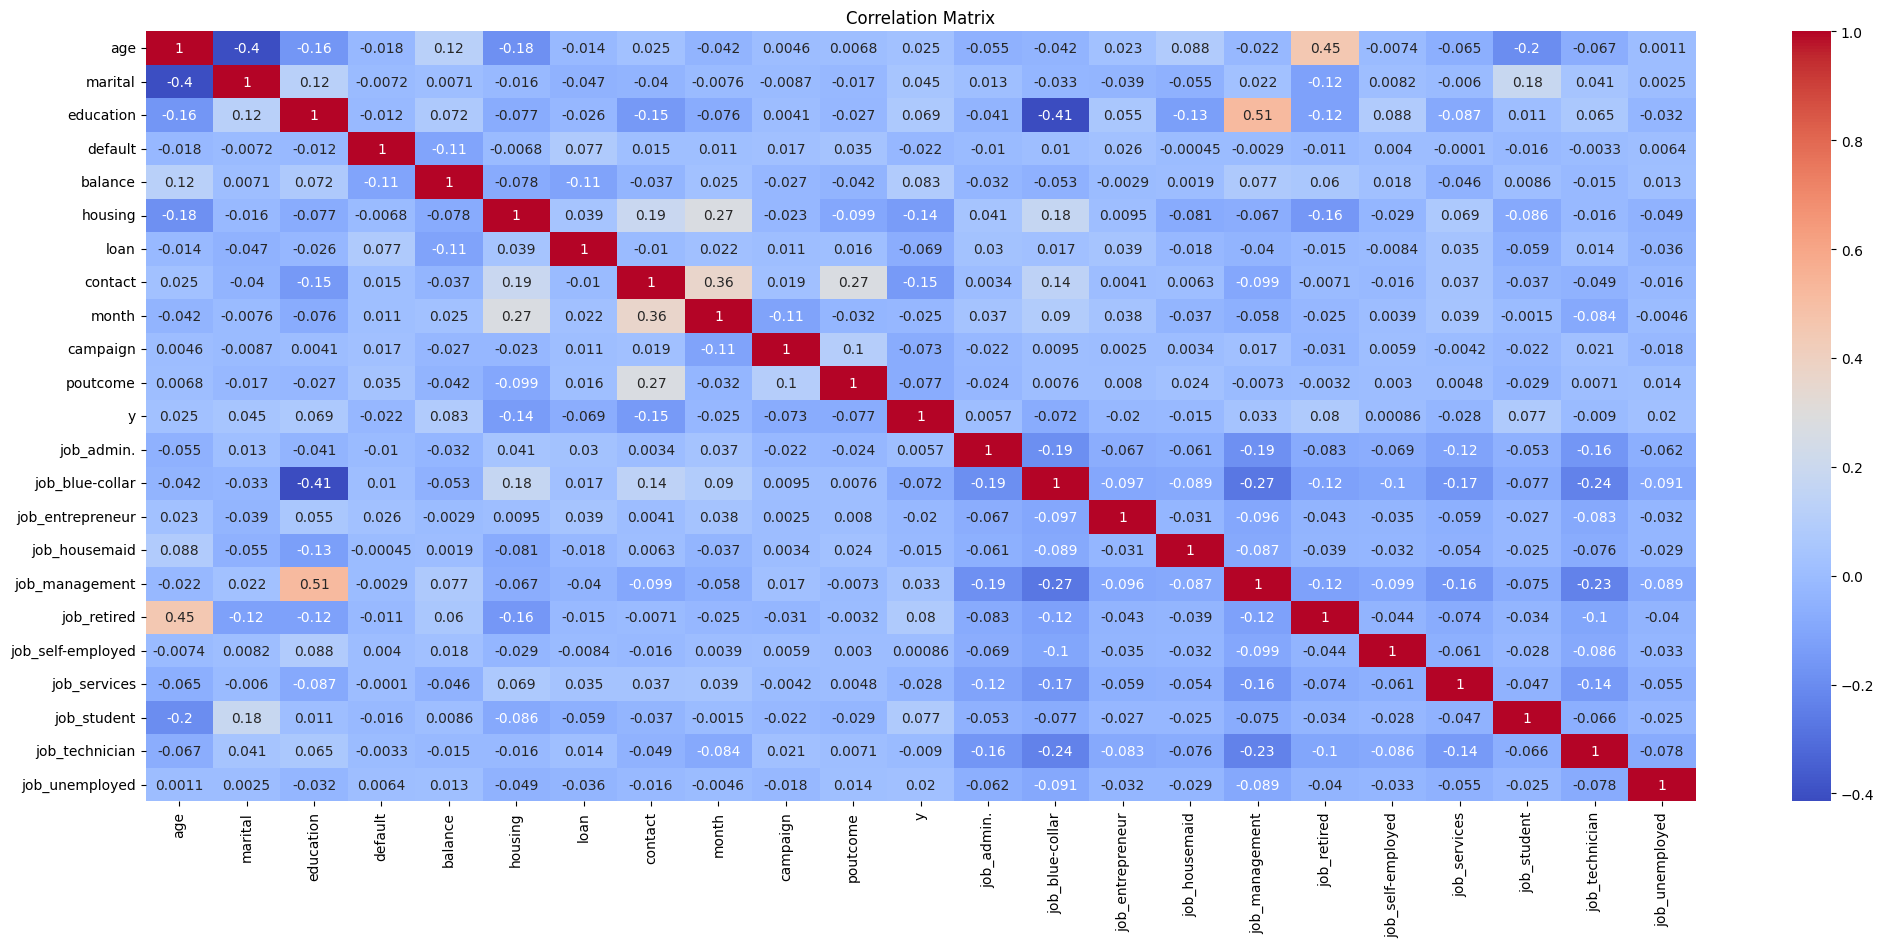

In [29]:
plt.figure(figsize=(25,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [30]:
train_data, data_vzorek = train_test_split(data_mod, test_size=0.2, random_state=42,stratify=y)

NameError: name 'y' is not defined

In [ ]:
data_vzorek.describe(include='all')

,age,marital,education,default,balance,housing,loan,contact,month,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,...,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00,8985.00
mean,22.95,1.16,1.15,0.02,1945.86,0.56,0.16,0.65,5.56,1.78,...,0.22,0.03,0.03,0.21,0.05,0.04,0.09,0.02,0.17,0.03
std,10.56,0.61,0.66,0.13,1448.90,0.50,0.37,0.90,2.98,3.12,...,0.42,0.18,0.16,0.41,0.22,0.19,0.28,0.14,0.38,0.17
min,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,1.00,1.00,0.00,986.00,0.00,0.00,0.00,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,21.00,1.00,1.00,0.00,1354.00,1.00,0.00,0.00,6.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,30.00,2.00,2.00,0.00,2287.00,1.00,0.00,2.00,8.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,74.00,2.00,2.00,1.00,7138.00,1.00,1.00,2.00,11.00,40.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Nová sekce

In [ ]:
X = data_vzorek.drop('y', axis=1)
y = data_vzorek['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [ ]:

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)



100%|██████████| 29/29 [00:20<00:00,  1.45it/s]

[LightGBM] [Info] Number of positive: 841, number of negative: 6347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 7188, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117001 -> initscore=-2.021146
[LightGBM] [Info] Start training from score -2.021146


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.63               0.63     0.63      0.70   
GaussianNB                         0.73               0.61     0.61      0.77   
LGBMClassifier                     0.89               0.59     0.59      0.86   
QuadraticDiscriminantAnalysis      0.68               0.58     0.58      0.73   
DecisionTreeClassifier             0.82               0.58     0.58      0.82   
XGBClassifier                      0.88               0.57     0.57      0.85   
BaggingClassifier                  0.87               0.57     0.57      0.85   
RandomForestClassifier             0.88               0.56     0.56      0.85   
ExtraTreesClassifier               0.88               0.56     0.56      0.85   
AdaBoostClassifier                 0.89               0.56     0.56      0.85   
ExtraTreeClassifier         

In [ ]:
def fine_tune_best_model(X_train, y_train, model_name="KNeighborsClassifier"):
    # define which hyperparameters to tune per algorithm
    hyperparameters = {
        "KNeighborsClassifier": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan', 'euclidean']},
        "AdaBoostClassifier": {'n_estimators': [10, 50, 100], 'learning_rate': [0.5, 1, 1.5, 3], 'algorithm': ['SAMME', 'SAMME.R']},
        "RandomForestClassifier": {'criterion': ["gini", "entropy"], 'min_samples_leaf': [1, 5, 10], 'n_estimators': [10, 50, 100]},
        "SVC": {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
        "ExtraTreeClassifier": {'random_state': [42]},
        "NearestCentroid": {'metric': ['euclidean'], 'shrink_threshold': [2]}
    }
# chech whether we have model in the "database" and init instance
    if model_name=="KNeighborsClassifier":
      model = KNeighborsClassifier()
    elif model_name=="AdaBoostClassifier":
      model = AdaBoostClassifier()
    elif model_name=="RandomForestClassifier":
      model = RandomForestClassifier()
    elif model_name == "SVC":
      model = SVC()
    elif model_name =="ExtraTreeClassifier":
      model = ExtraTreeClassifier()
    elif model_name =="NearestCentroid":
      model = NearestCentroid()
    else:
      print("zatím neznám")
      return None
    # create gridseach with defined hyperparameters
    print("Počítám....")

    gs = GridSearchCV(model, hyperparameters[model_name], scoring='f1_weighted', verbose=0)
    gs.fit(X_train, y_train)

    print(f"For {model_name} best parameters: {gs.best_params_}")

  # return best model
    return gs.best_estimator_


In [ ]:
best_NearestCentroid= fine_tune_best_model(X_train, y_train, model_name="NearestCentroid")

Počítám....
For NearestCentroid best parameters: {'metric': 'euclidean', 'shrink_threshold': 2}


In [ ]:
# models = ['NearestCentroid','GaussianNB','LGBMClassifier','QuadraticDiscriminantAnalysis','DecisionTreeClassifier']

In [ ]:
def evaluate_models(X_test, y_test, models):
    results = []

    for model in models:
        metrics = {
            "accuracy": 0,
            "precision": 0,
            "recall": 0,
            "f1": 0
        }

        y_pred = model.predict(X_test)

        metrics["accuracy"] = accuracy_score(y_test, y_pred)
        metrics["precision"] = precision_score(y_test, y_pred, average='weighted')
        metrics["recall"] = recall_score(y_test, y_pred, average='weighted')
        metrics["f1"] = f1_score(y_test, y_pred, average='weighted')

        results.append(metrics)

In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.63               0.63     0.63      0.70   
GaussianNB                         0.73               0.61     0.61      0.77   
LGBMClassifier                     0.89               0.59     0.59      0.86   
QuadraticDiscriminantAnalysis      0.68               0.58     0.58      0.73   
DecisionTreeClassifier             0.82               0.58     0.58      0.82   
XGBClassifier                      0.88               0.57     0.57      0.85   
BaggingClassifier                  0.87               0.57     0.57      0.85   
RandomForestClassifier             0.88               0.56     0.56      0.85   
ExtraTreesClassifier               0.88               0.56     0.56      0.85   
AdaBoostClassifier                 0.89               0.56     0.56      0.85   
ExtraTreeClassifier         

In [ ]:
evaluate_models(X_test,y_test,models)

AttributeError: 'str' object has no attribute 'predict'

In [ ]:
NC_model = NearestCentroid(metric='euclidean', shrink_threshold=2)
NC_model.fit(X_train, y_train)

NearestCentroid(shrink_threshold=2)

In [ ]:
NC_model.score(X_train, y_train)

0.6789092932665554

In [ ]:
NC_model.score(X_test,y_test)

0.6983861992209237

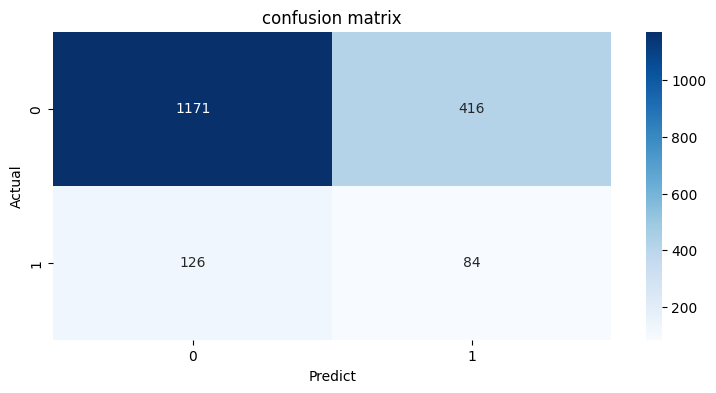

In [ ]:
plt.figure(figsize=(9,4))
P=NC_model.predict(X_test)
NC_model_cm=confusion_matrix(y_test,P)
sns.heatmap(NC_model_cm,annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");

# Konec

In [ ]:
correlation_matrix1 = X_ladici.corr()

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [ ]:
for i in data_mod.columns:
    if data_mod[i].dtype !="object":
        plt.figure(figsize=(10,6))

        plt.subplot(2,3,1)
        sns.histplot(data_mod[i], kde=True)
        plt.title(f"distribution of {i}")

        plt.subplot(2,3,2)
        sns.boxplot(data_mod[i])
        plt.ylabel(i)
        plt.title(f"boxplot of {i}")

        plt.subplot(2,3,3)
        sns.lineplot(data=data_mod, x=i, y="y")
        plt.title(f"Line plot of {i} vs y")